Intercept: 0.100000000000000
Slope: 1.00000000000000


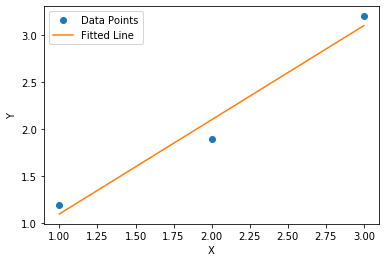

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

beta = 1
w0,w1 = sp.symbols('w0 w1')

#     1 1
# x = 1 2    y = 1.2 1.9 3.2   w = w0 w1 
#     1 3
# we need to find w0,w1 for maximum likelihood

x = sp.Matrix([[1,1], [1,2], [1,3]])
t = sp.Matrix([[1.2,1.9,3.2]])
w = sp.Matrix([[w0,w1]])
n = 3

# y = x*w^T - t^T

expr = x*sp.Transpose(w) - sp.Transpose(t)

# log likelihood function:
# ln P(t|x,w,beta) = -beta/2*sum(y(x,w)-t)^2 + (n/2)ln(beta) -(n/2)ln(2*pi)

p = (-beta/2)*sum(np.square((expr))) + (n/2)*np.log(beta) - (n/2)*np.log(2*np.pi)

# Maximizing the log likelihood function by differentiating it w.r.t w 
# and equating to 0 to solve for w0 and w1

d1 = sp.diff(p[0],w0)
d2 = sp.diff(p[0],w1)

sol = sp.solve((d1, d2), (w0,w1))

x_vals = [x[i,1] for i in range(3)]
y_vals = list(t)

line_eqn =[sol[w0] + sol[w1]*i for i in x_vals]

print("Intercept:",sol[w0])
print("Slope:",sol[w1])
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_vals,y_vals,'o', label = "Data Points")
plt.plot(x_vals, line_eqn, label="Fitted Line")
plt.legend(loc='best')